# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hilda Oktaviani
- **Email:** hildaoktaa24@gmail.com
- **ID Dicoding:** hilda_oktaviani

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1 : Bagaimana faktor cuaca dapat mempengaruhi tinggi rendahnya tingkat penyewaan sepeda?
- Pertanyaan 2 : Faktor apa yang menentukan titik tertinggi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca file csv

In [ ]:
hour_df = pd.read_csv('hour.csv')

In [ ]:
day_df = pd.read_csv('day.csv')

Menampilkan data frame dari file csv

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Berdasarkan data diatas, terlihat bawha mayoritas penyewa sepeda adalah pelanggan tetap yang terdaftar
- Berdasarkan data diatas, penyewaan sepeda tampak dipengaruhi oleh suhu dan cuaca

### Assessing Data

Memeriksa apakah ada data dengan missing values

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa duplikasi data

In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
day_df.duplicated().sum()

0

Menampilkan tipe data

In [ ]:
pd.to_datetime(hour_df['dteday'])

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


In [ ]:
pd.to_datetime(day_df['dteday'])


,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30


Ringkasan statistik untuk mengidentifikasi potensi outlier

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan hasil wriling data yang telah dilakukan, dapat dilihat bahwa dari kedua set data bersih dari missing value dan duplikasi, maka dapat disimpulkan bahwa data tersebut sudah cukup baik dari segi kelengkapan dan kualitas
- Berdasarkan deskripsi statistik, dapat dilihat bahwa cuaca memiliki pengaruh terhadap penyewaan sepeda

### Cleaning Data

Mengubah kolom date dtday menjadi format datetime

In [ ]:
pd.to_datetime(day_df['dteday'])

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30


In [ ]:
pd.to_datetime(hour_df['dteday'])

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


Menyimpan dataset yang sudah bersih

In [ ]:
hour_df.to_csv('/content/clean_hour_df.csv')

In [ ]:
day_df.to_csv('/content/clean_day_df.csv')

## Exploratory Data Analysis (EDA)

### Explore ...

Menampilkan korelasi faktor cuaca dengan penyewaan sepeda

In [ ]:
cuaca = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

In [ ]:
cuaca[['cnt']]

,cnt
temp,0.627494
hum,-0.100659
windspeed,-0.234545
cnt,1.000000


Korelasi musim dengan penyewaan sepeda

In [ ]:
musim_rental = day_df.groupby('season')['cnt'].mean().reset_index()
musim_rental

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


Korelasi perbedaan hari libur dan hari kerja dengan penyewaan sepeda

In [ ]:
hari_kerja = day_df.groupby('workingday')['cnt'].mean().reset_index()
hari_kerja

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


In [ ]:
hari_libur = day_df.groupby('holiday')['cnt'].mean().reset_index()
hari_libur

,holiday,cnt
0,0,4527.104225
1,1,3735.000000


**Insight:**
- Dapat dilihat berdasarkan data suhu (temperatur) memiliki pengaruh cukup besar terhadap penyewaan sepeda.
- Berdasarkan hasil explorasi data, dapat dilihat bahwa musim panas dan hari kerja memiliki rata-rata penyewaan cukup tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana faktor cuaca dapat mempengaruhi tinggi rendahnya tingkat penyewaan sepeda?

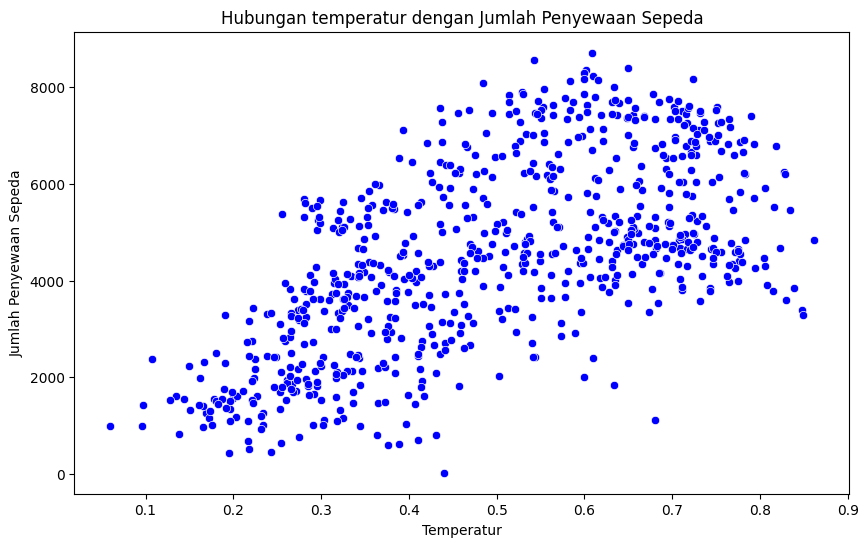

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue')
plt.title('Hubungan temperatur dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

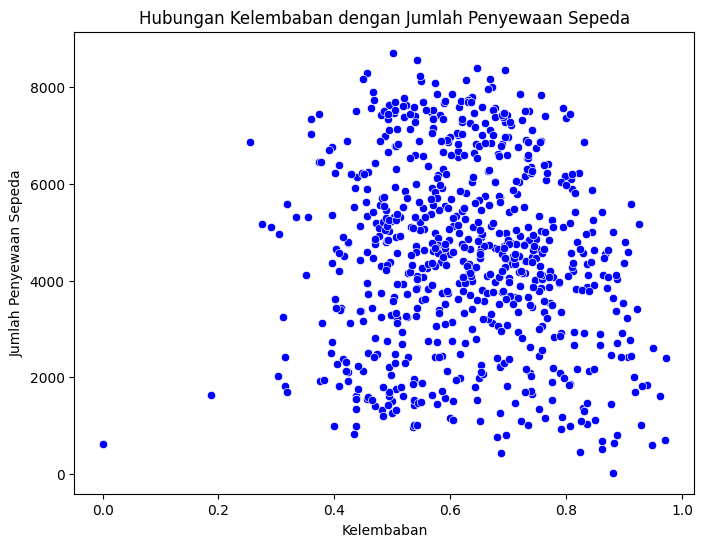

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df, color='blue')
plt.title('Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

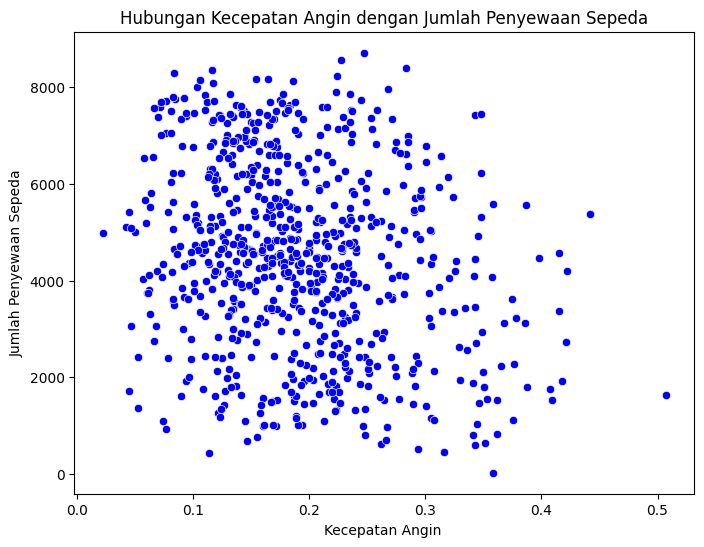

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, color='blue')
plt.title('Hubungan Kecepatan Angin dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin ')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

Faktor apa yang menentukan titik tertinggi penyewaan sepeda?

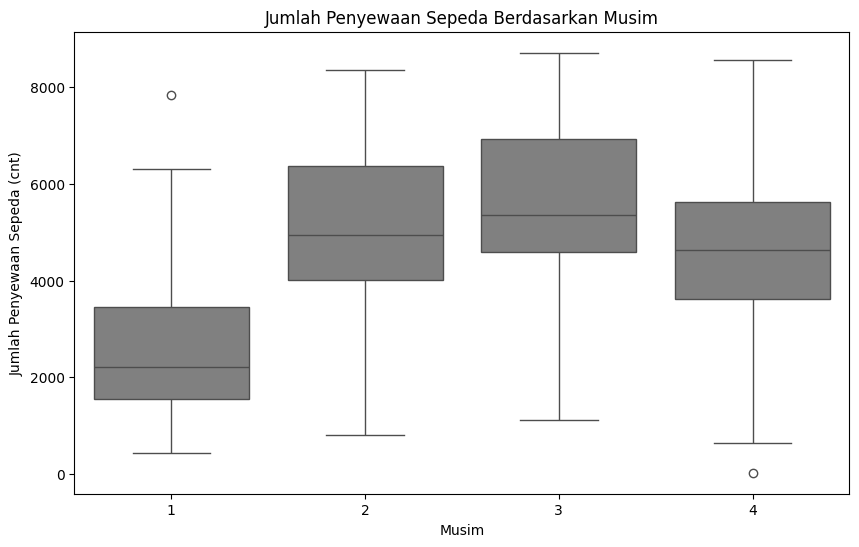

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, color='Grey')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

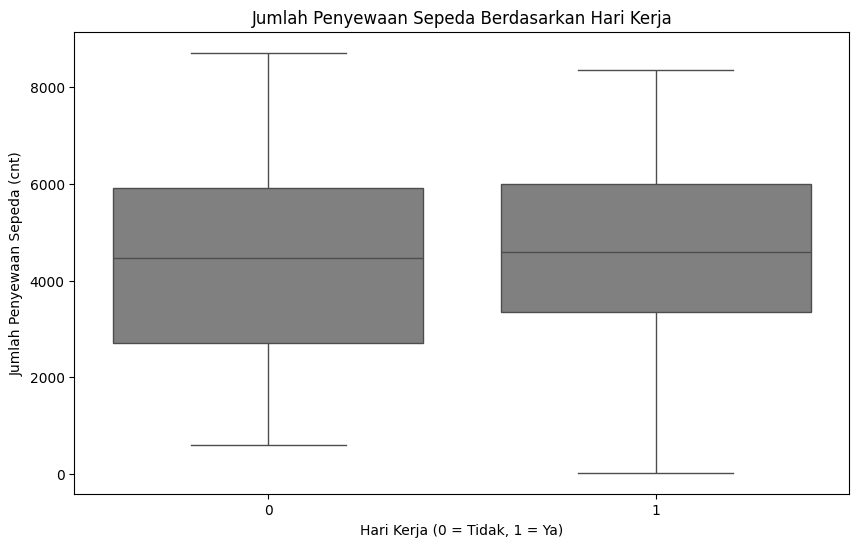

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df, color='Grey')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi data tersebut, dapat dilihat bahwa suhu memiliki korelasi positif terhadap penyewaan sepeda, berdasarkan data diatas semakin tinggi suhu maka semakin banyak sepeda yang di sewa
- Perubahan musim dan perbedaan antara hari kerja dengan hari libur mempengaruhi penyewaan sepeda

## Conclusion

- Conclution pertanyaan 1
  
  Faktor cuaca dapat mempengaruhi tingkat penyewaan sepeda, berdasarkan hasil analisis dapat disimpulkan bahwa suhu mempunyai jumlah yang signifikan terhadap jumlah penyewa. faktor cuaca lainnya sepert kelembaban dan kecepatan angin memiliki pengaruh yang cenderung lebih kecil dan menunjukan korelasi yang lemah.

- Conclution pertanyaan 2

  Berdasarkan data yang telah dianalisis dan divualisasikan, musim panas dan hari kerja menunjukan bahwa kedua faktor tersebut adalah yang paling mempengaruhi titik tertinggi penyewaan sepeda.


